In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sb
from pylab import rcParams

import scipy
from scipy.stats.stats import pearsonr

In [2]:


df = pd.read_csv('games.csv')
df

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


In [4]:
df = df.drop(columns = ['created_at', 'last_move_at', 'white_id', 'black_id'])
df

,id,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,13,outoftime,white,15+2,1500,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,16,resign,black,5+10,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,61,mate,white,5+10,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,61,mate,white,20+0,1439,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,95,mate,white,30+3,1523,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,24,resign,white,10+10,1691,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,82,mate,black,10+0,1233,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,35,mate,white,10+0,1219,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,109,resign,white,10+0,1360,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


In [73]:
opcode_num = df.opening_eco.unique()
len(opcode_num)

365

In [70]:
op_num = df.opening_ply.unique()
len(op_num)

23

In [72]:
increment_num = df.increment_code.unique()
len(increment_num)

400

In [102]:
len(df.white_rating.unique())

1516

In [103]:
len(df.black_rating.unique())

1521

In [25]:
%matplotlib inline
rcParams['figure.figsize'] = 20, 10
plt.style.use('seaborn-whitegrid')

Text(0.5, 1.0, 'Number of turns')

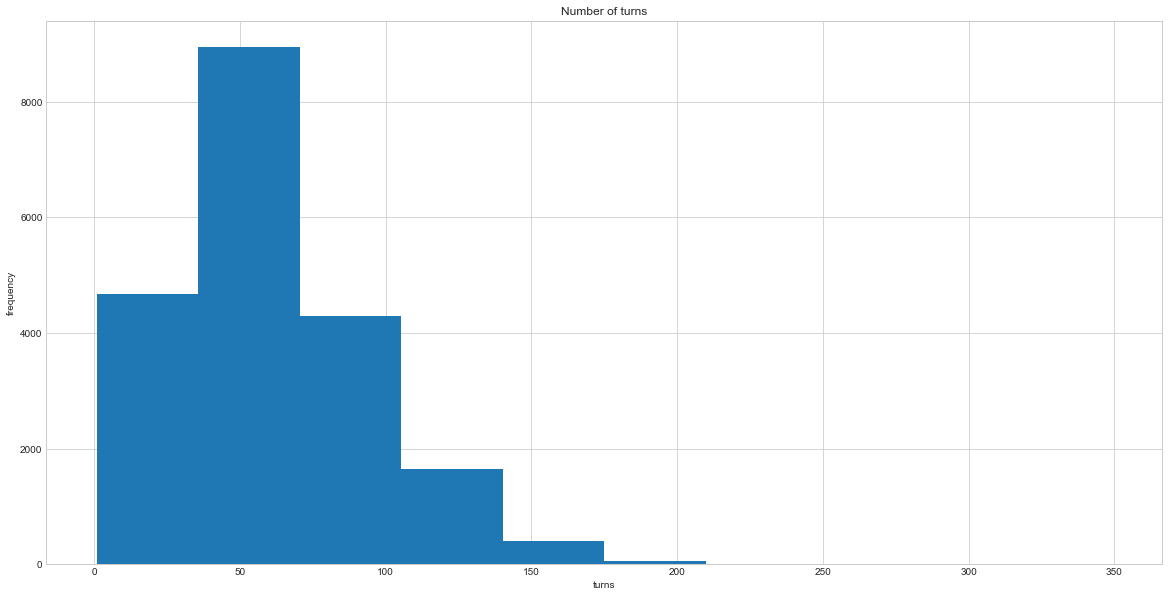

In [83]:
df['turns'].plot(kind = 'hist')
plt.xlabel('turns')
plt.ylabel('frequency')
plt.title('Number of turns')

In [104]:
new_df = df.groupby('winner').opening_eco.value_counts(normalize = True)
new_df

winner  opening_eco
black   A00            0.062589
        C00            0.042714
        D00            0.039530
        C20            0.038981
        B01            0.036455
                         ...   
white   E68            0.000100
        E87            0.000100
        E92            0.000100
        E95            0.000100
        E97            0.000100
Name: opening_eco, Length: 828, dtype: float64

In [106]:
inverse_new_df = df.groupby('opening_eco').winner.value_counts(normalize = True)
inverse_new_df

opening_eco  winner
A00          black     0.566038
             white     0.395233
             draw      0.038729
A01          black     0.487805
             white     0.463415
                         ...   
E95          white     1.000000
E97          black     0.333333
             draw      0.333333
             white     0.333333
E98          white     1.000000
Name: winner, Length: 828, dtype: float64

In [14]:
df_white = df[df['winner'] == 'white']
df_white

,id,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,13,outoftime,white,15+2,1500,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
2,mIICvQHh,True,61,mate,white,5+10,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,61,mate,white,20+0,1439,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,95,mate,white,30+3,1523,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
6,qwU9rasv,True,33,resign,white,10+0,1520,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10
...,...,...,...,...,...,...,...,...,...,...,...,...
20050,nYOvevdh,True,9,outoftime,white,10+0,1243,1142,c4 e5 d4 exd4 Qxd4 Nf6 Bg5 Be7 e4,A20,English Opening: King's English Variation,2
20052,EopEqqAa,True,37,resign,white,10+10,1219,1250,c4 e6 d4 b6 Nc3 Bb7 Nf3 g6 h4 Bg7 Bg5 f6 Bf4 d...,A40,English Defense,4
20053,EfqH7VVH,True,24,resign,white,10+10,1691,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20055,yrAas0Kj,True,35,mate,white,10+0,1219,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3


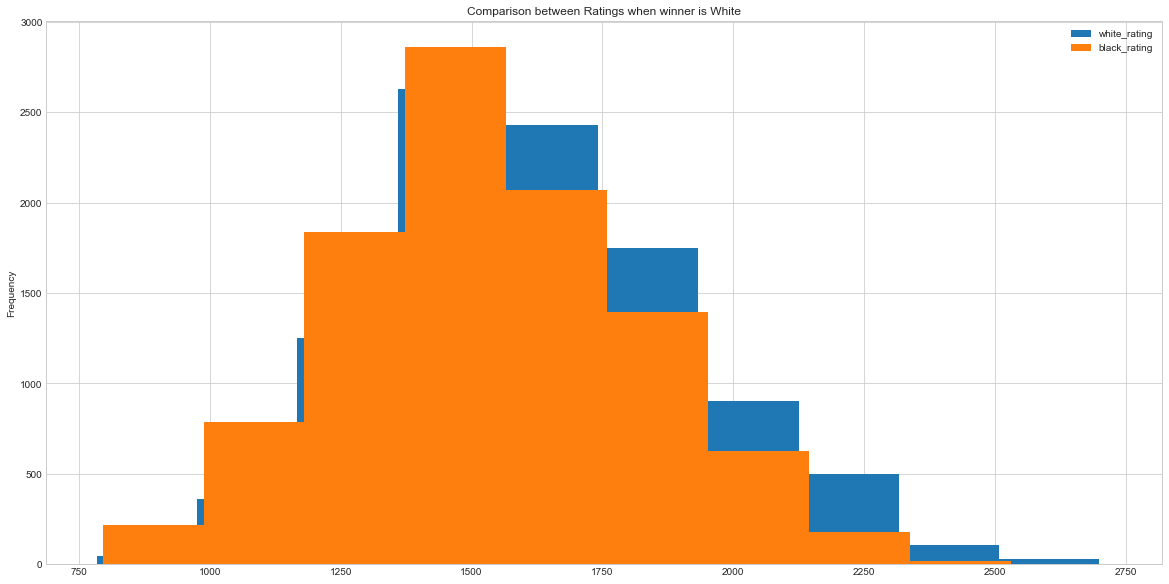

In [66]:
df_white['white_rating'].plot(kind = 'hist')
df_white['black_rating'].plot(kind = 'hist')
plt.title("Comparison between Ratings when winner is White")
plt.legend(loc='upper right')
plt.savefig('comp_winner_is_white.png')
plt.show()

In [30]:
df_black = df[df['winner'] == 'black']
df_black

,id,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply
1,l1NXvwaE,True,16,resign,black,5+10,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
7,RVN0N3VK,False,9,resign,black,15+30,1413,2108,e4 Nc6 d4 e5 d5 Nce7 c3 Ng6 b4,B00,Nimzowitsch Defense: Kennedy Variation | Link...,5
8,dwF3DJHO,True,66,resign,black,15+0,1439,1392,e4 e5 Bc4 Nc6 Nf3 Nd4 d3 Nxf3+ Qxf3 Nf6 h3 Bc5...,C50,Italian Game: Schilling-Kostic Gambit,6
11,Vf5fKWzI,False,38,resign,black,20+60,1381,1867,e4 e6 d4 d5 e5 c5 c3 Nc6 Nf3 Qb6 Be3 Qxb2 Nbd2...,C02,French Defense: Advance Variation | Paulsen A...,9
12,HRti5mKv,False,60,resign,black,5+40,1381,1936,e4 e6 Nf3 d5 exd5 exd5 Qe2+ Be7 Nc3 Nf6 d4 O-O...,C00,French Defense: Knight Variation,3
...,...,...,...,...,...,...,...,...,...,...,...,...
20041,B4IEyQyb,True,58,mate,black,10+10,1263,1770,d4 d5 Bf4 Bf5 e3 Nf6 c3 e6 Nf3 Nh5 Bg5 f6 Bh4 ...,D00,Queen's Pawn Game: Mason Attack,3
20046,tM5wivnc,True,36,mate,black,10+10,1250,1235,e4 d6 d4 Nf6 e5 dxe5 Be2 exd4 Nf3 Nc6 O-O e5 B...,B07,Pirc Defense,4
20051,uMzb0TPC,True,58,mate,black,10+10,1237,1231,e4 e6 Nf3 d5 Bb5+ Bd7 c4 c6 Ba4 Qa5 b3 b5 cxb5...,C00,French Defense: Knight Variation,3
20054,WSJDhbPl,True,82,mate,black,10+0,1233,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2


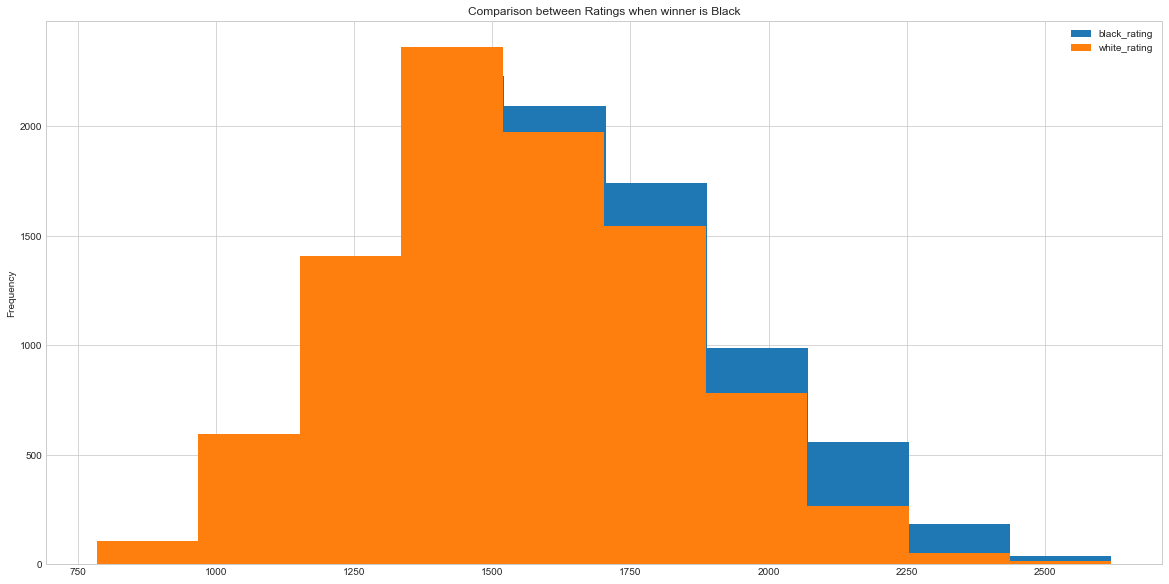

In [65]:
df_black['black_rating'].plot(kind = 'hist')
df_black['white_rating'].plot(kind = 'hist')
plt.title("Comparison between Ratings when winner is Black")
plt.legend(loc='upper right')
plt.savefig('comp_winner_is_Black.png')
plt.show()

In [37]:
df_gm = df[df['white_rating'] >= 2000]
df_gm = df_gm[df_gm['black_rating'] >= 2000]
df_gm

,id,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply
636,xSwSmC1e,True,86,resign,black,10+0,2306,2405,e4 e5 Nf3 Nc6 Nc3 Nf6 Nxe5 Nxe5 d4 Nc6 d5 Bb4 ...,C46,Four Knights Game: Halloween Gambit,7
637,TovD1oTY,True,58,resign,black,10+0,2422,2386,e4 c5 d4 cxd4 c3 Nf6 e5 Nd5 cxd4 d6 exd6 Qxd6 ...,B22,Sicilian Defense: Alapin Variation | Smith-Mo...,8
638,u0FzSAO8,True,50,resign,black,10+0,2373,2356,e4 c5 Nf3 Nc6 d4 cxd4 Nxd4 Nf6 Nc3 e5 Ndb5 d6 ...,B33,Sicilian Defense: Lasker-Pelikan Variation | ...,17
639,1YmgTIJI,True,62,resign,black,10+0,2325,2338,d4 Nf6 Nf3 d5 g3 Bf5 Bg2 e6 O-O Be7 c4 c6 Nc3 ...,D02,Queen's Pawn Game: Symmetrical Variation | Ps...,5
642,78hLyDK0,True,43,resign,white,10+0,2329,2017,d4 Nf6 c4 c5 d5 e6 Nc3 exd5 cxd5 d6 e4 g6 f4 B...,A67,Benoni Defense: Taimanov Variation,15
...,...,...,...,...,...,...,...,...,...,...,...,...
20013,Uk0pZCRR,True,95,resign,black,45+45,2094,2228,e4 e5 Nf3 Nc6 Bb5 g6 d4 exd4 Bxc6 dxc6 Qxd4 Qx...,C60,Ruy Lopez: Fianchetto Defense,6
20014,ZhZm1ol9,True,109,draw,draw,45+45,2229,2220,e4 e5 Nf3 Nc6 Bc4 Bc5 c3 Nf6 d4 exd4 cxd4 Bb4+...,C54,Italian Game: Classical Variation | Greco Gam...,17
20015,fpqjttDx,True,42,resign,black,7+30,2162,2214,d4 Nf6 c4 e6 Nf3 Bb4+ Bd2 a5 e3 O-O Bd3 b6 O-O...,E11,Bogo-Indian Defense: Wade-Smyslov Variation,8
20016,lzPgCJCS,True,102,resign,black,7+30,2236,2148,e4 g6 Nc3 Bg7 f4 c6 g3 d6 Bg2 e5 fxe5 dxe5 d3 ...,B06,Modern Defense,2


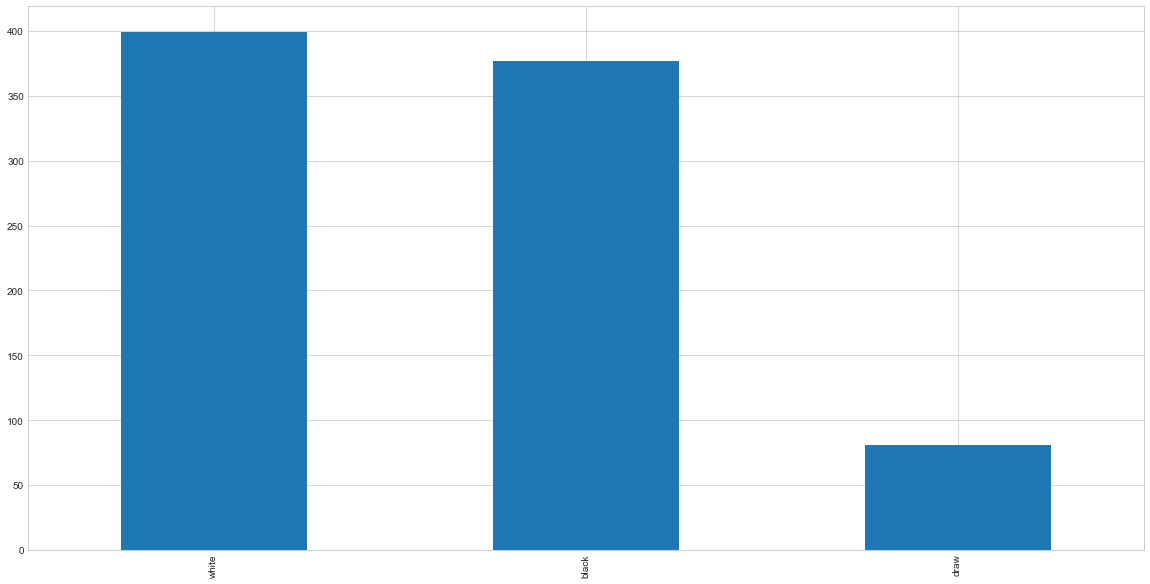

In [76]:
df_gm['winner'].value_counts().plot(kind = 'bar')

In [39]:
openings_gm = df_gm.opening_eco.unique()
len(openings_gm)

232

In [51]:
opening_variation_ratio = len(openings_gm) / df_gm.shape[0]
opening_variation_ratio 

0.2707117852975496

In [42]:
df_novices = df[df['white_rating'] <= 1200]
df_novices = df_novices[df_novices['black_rating']<= 1200]
df_novices

,id,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply
14,u7i6dOaJ,False,31,mate,white,15+15,1094,1141,e4 e5 Nf3 Nc6 Bc4 Nf6 Nc3 Bc5 O-O O-O d3 Ne8 B...,C50,Four Knights Game: Italian Variation,8
15,guanvMR5,False,43,resign,black,15+15,1141,1094,e4 e5 Nf3 Nc6 Bc4 Nf6 Ng5 Qe7 O-O Nxe4 Nxe4 h6...,C57,Italian Game: Two Knights Defense | Knight At...,7
16,PmpkWkmm,False,52,resign,black,15+15,1094,1141,e4 e5 Nf3 Nc6 Bc4 Nf6 Nc3 Bc5 O-O O-O Ne1 d6 d...,C50,Four Knights Game: Italian Variation,8
17,EwaK0IsE,False,66,mate,black,15+16,1141,1094,e4 e5 Nf3 Nc6 Bc4 Nf6 Nc3 Bc5 O-O O-O Ne1 Ne8 ...,C50,Four Knights Game: Italian Variation,8
21,QFCZwY1f,False,3,resign,white,30+60,1094,1068,d4 e6 Nc3,A40,Horwitz Defense,2
...,...,...,...,...,...,...,...,...,...,...,...,...
19686,3EjZG9D4,True,49,resign,white,10+8,1164,984,e4 c5 Qh5 g6 Qe5 d6 Qxh8 Nc6 Qxg8 Bg4 Qxh7 Qd7...,B20,Sicilian Defense,2
19687,gxQjNpo7,True,16,mate,black,15+15,1003,1122,e4 e5 Nf3 d6 Nc3 Bg4 Be2 Be6 h3 Qf6 O-O Qg6 d3...,C41,Philidor Defense #2,4
19745,NFvul5Jr,True,45,resign,white,60+0,1053,840,e4 e5 d3 d6 f3 f6 g3 g6 c3 c6 b3 b6 d4 d5 Nh3 ...,C20,King's Pawn Game: Leonardis Variation,3
19746,zfhhvhea,False,5,resign,white,10+0,1010,840,e4 e5 Nf3 d6 Bc4,C41,Philidor Defense #3,5


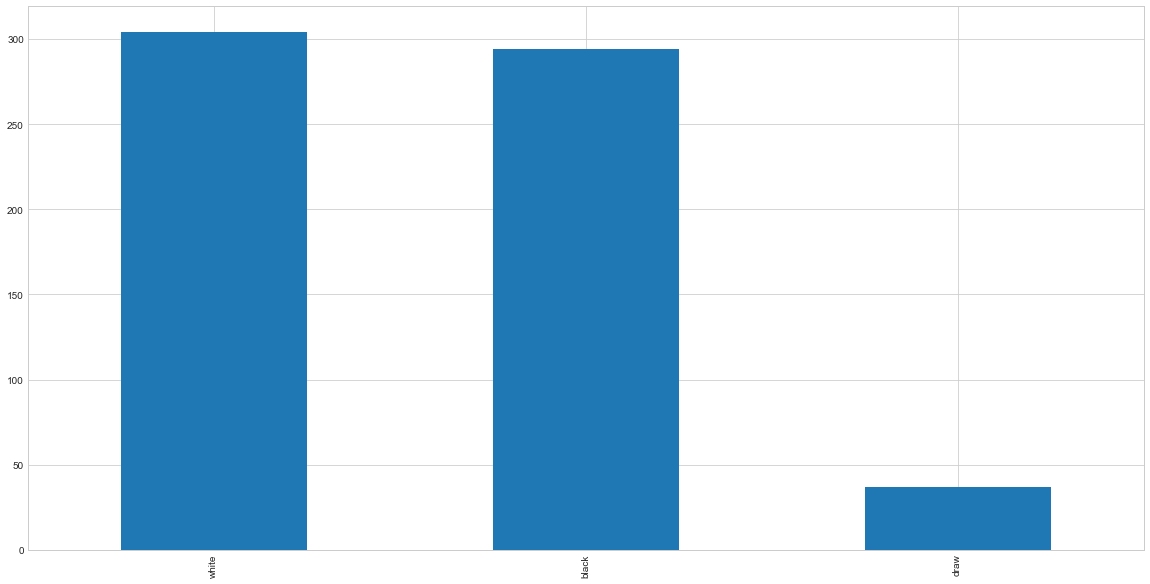

In [84]:
df_novices['winner'].value_counts().plot(kind='bar')

In [43]:
openings_novices = df_novices.opening_eco.unique()
len(openings_novices)

83

In [53]:
opening_variation_ratio_novices =  len(openings_novices) / df_novices.shape[0]
opening_variation_ratio_novices

0.13070866141732285

Text(0.5, 1.0, 'Barplot of openings for players rated under 1200')

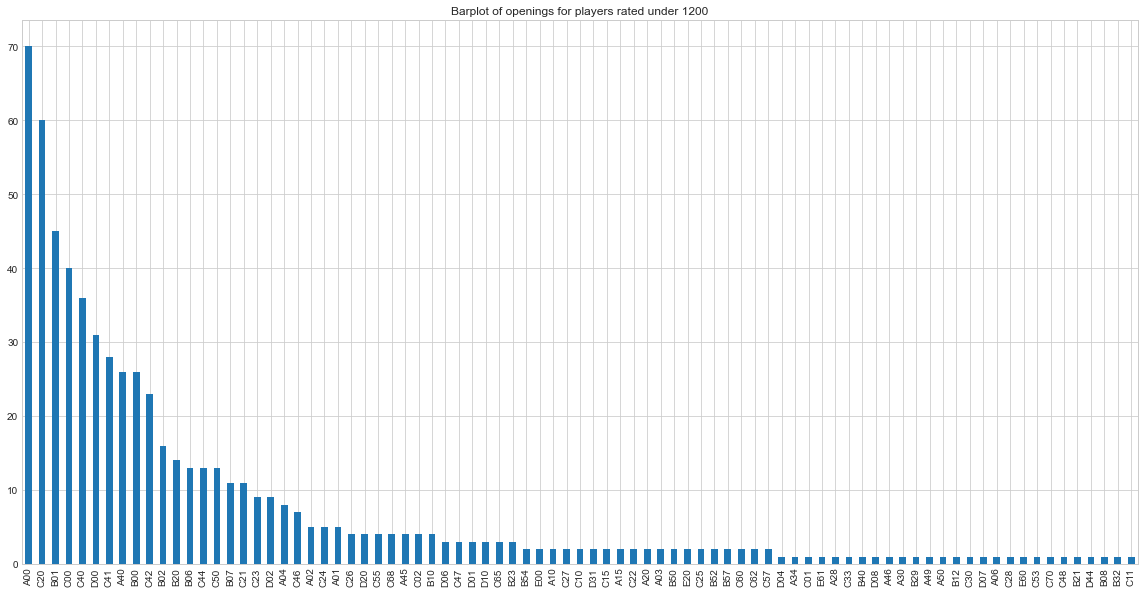

In [82]:
df_novices['opening_eco'].value_counts().plot(kind = 'bar')
plt.title('Barplot of openings for players rated under 1200')

Text(0.5, 1.0, 'Barplot of openings for players rated over 2000')

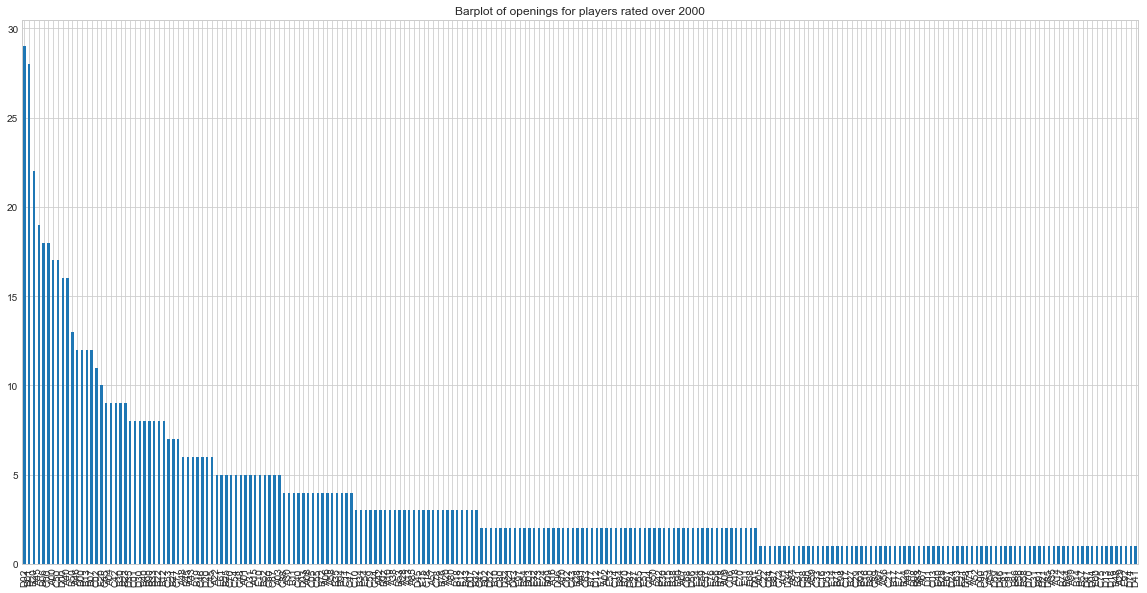

In [80]:
df_gm['opening_eco'].value_counts().plot(kind = 'bar')
plt.title('Barplot of openings for players rated over 2000')

As expected openings for high rated players have more variances than for the low rated players.

In [85]:
df_white1 = df_white[df_white['white_rating'] > df_white['black_rating']]
df_white1

,id,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,13,outoftime,white,15+2,1500,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
4,9tXo1AUZ,True,95,mate,white,30+3,1523,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
6,qwU9rasv,True,33,resign,white,10+0,1520,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10
9,afoMwnLg,True,119,mate,white,10+0,1381,1209,e4 d5 exd5 Qxd5 Nc3 Qe5+ Be2 Na6 d4 Qf5 Bxa6 b...,B01,Scandinavian Defense: Mieses-Kotroc Variation,4
10,HgKLWPsz,False,39,mate,white,20+60,1381,1272,e3 e6 d4 d6 Bd3 c6 Nf3 Be7 Nc3 Nf6 Bd2 Bd7 Qe2...,A00,Van't Kruijs Opening,1
...,...,...,...,...,...,...,...,...,...,...,...,...
20048,dnexZDsv,True,25,resign,white,10+10,1252,1233,e4 e6 d4 d5 exd5 Qxd5 Nc3 Bb4 a3 Bxc3+ bxc3 Ne...,C01,French Defense: Exchange Variation,5
20049,7IENcPg3,True,43,mate,white,10+0,1328,1252,e4 e6 Nf3 d5 Nc3 Bb4 exd5 exd5 d4 Bg4 a3 Bxc3+...,C00,French Defense: Two Knights Variation,5
20050,nYOvevdh,True,9,outoftime,white,10+0,1243,1142,c4 e5 d4 exd4 Qxd4 Nf6 Bg5 Be7 e4,A20,English Opening: King's English Variation,2
20053,EfqH7VVH,True,24,resign,white,10+10,1691,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2


In [86]:
df_white2 = df_white[df_white['white_rating'] < df_white['black_rating']]
df_white2

,id,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply
2,mIICvQHh,True,61,mate,white,5+10,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,61,mate,white,20+0,1439,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
14,u7i6dOaJ,False,31,mate,white,15+15,1094,1141,e4 e5 Nf3 Nc6 Bc4 Nf6 Nc3 Bc5 O-O O-O d3 Ne8 B...,C50,Four Knights Game: Italian Variation,8
25,ifUMWtVj,True,69,mate,white,10+10,1078,1219,d4 d5 Nc3 Nf6 Bf4 Bf5 Nf3 e6 e3 Be7 Bb5+ c6 Bd...,D01,Queen's Pawn Game: Chigorin Variation,4
52,KYPdQv8e,False,53,mate,white,10+0,978,1500,d4 f5 e3 Nf6 Nc3 d5 Bb5+ c6 Bd3 b5 Qf3 Qa5 Bxf...,A80,Dutch Defense,2
...,...,...,...,...,...,...,...,...,...,...,...,...
20036,cDSybWIj,True,43,mate,white,10+0,1247,1436,c4 e5 Nc3 Bc5 e3 Nc6 a3 Nf6 b4 Bd6 Nf3 a6 c5 B...,A21,English Opening: King's English Variation | R...,3
20043,Z490CURF,True,11,resign,white,10+10,1252,1290,c4 Nf6 Nc3 d5 cxd5 Nxd5 e4 Nf4 d4 c6 Bxf4,A16,English Opening: Anglo-Gruenfeld Defense,4
20047,X0DJ1fJu,True,73,mate,white,10+10,1222,1262,c4 d5 e3 dxc4 Bxc4 Nc6 a3 Ne5 d4 Nxc4 Nc3 e5 N...,A10,English Opening: Anglo-Scandinavian Defense,2
20052,EopEqqAa,True,37,resign,white,10+10,1219,1250,c4 e6 d4 b6 Nc3 Bb7 Nf3 g6 h4 Bg7 Bg5 f6 Bf4 d...,A40,English Defense,4


In [87]:
df_white3 = df_white[df_white['white_rating'] == df_white['black_rating']]
df_white3

,id,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply
97,nBfSissu,False,14,resign,white,45+0,1500,1500,e4 e5 Bc4 Nc6 d3 Nf6 Nf3 Bc5 Ng5 d6 Nxf7 Qe7 N...,C50,Italian Game: Giuoco Pianissimo | Normal,8
144,p7a4FGwp,True,30,resign,white,15+15,1227,1227,e4 Nf6 Nc3 e5 Bc4 Bc5 Nf3 Nc6 Ng5 O-O Bxf7+ Rx...,C50,Four Knights Game: Italian Variation,8
153,GT8TdRlm,True,85,mate,white,15+15,1212,1212,e4 g6 d4 h5 Bc4 e6 Bf4 d5 exd5 exd5 Bb3 Bb4+ c...,B06,Modern Defense,2
156,xwl41jna,True,65,outoftime,white,7+2,1852,1852,e4 c5 Nf3 Nc6 Bb5 a6 Be2 d6 O-O Nf6 Nc3 e5 Re1...,B30,Sicilian Defense: Nyezhmetdinov-Rossolimo Attack,5
385,VC0euQZC,True,41,resign,white,10+0,1337,1337,e4 e5 Nf3 Be7 Nc3 Nf6 d4 d5 Bg5 dxe4 Bxf6 Bxf6...,C40,King's Knight Opening,3
...,...,...,...,...,...,...,...,...,...,...,...,...
19831,eBBl99KP,False,57,resign,white,10+0,1500,1500,e4 e5 Nf3 d6 d4 exd4 Nxd4 Nf6 Bg5 Be7 Nc3 h6 B...,C41,Philidor Defense: Exchange Variation,8
19835,ctm17fcQ,False,45,mate,white,10+0,1500,1500,e4 c5 Bc4 Nc6 Nf3 Qc7 d4 cxd4 Nxd4 e6 O-O Nf6 ...,B20,Sicilian Defense: Bowdler Attack,3
19842,gK3xiIiz,False,171,outoftime,white,10+0,1500,1500,e4 e5 Qh5 Nc6 Bc4 g6 Qf3 Nf6 d3 Nd4 Qd1 d5 Bb5...,C20,King's Pawn Game: Wayward Queen Attack,3
19858,RZmv4UQ4,False,47,resign,white,10+0,1500,1500,e4 e5 Bb5 a6 Ba4 b6 a3 b5 Bb3 Nf6 d3 d5 Bg5 Nb...,C20,Portuguese Opening,3


#  When Black Wins

### Black wins while: White is rated HIGHER than Black 

In [88]:
df_black1 = df_black[df_black['white_rating'] > df_black['black_rating']]
df_black1

,id,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply
1,l1NXvwaE,True,16,resign,black,5+10,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
8,dwF3DJHO,True,66,resign,black,15+0,1439,1392,e4 e5 Bc4 Nc6 Nf3 Nd4 d3 Nxf3+ Qxf3 Nf6 h3 Bc5...,C50,Italian Game: Schilling-Kostic Gambit,6
15,guanvMR5,False,43,resign,black,15+15,1141,1094,e4 e5 Nf3 Nc6 Bc4 Nf6 Ng5 Qe7 O-O Nxe4 Nxe4 h6...,C57,Italian Game: Two Knights Defense | Knight At...,7
17,EwaK0IsE,False,66,mate,black,15+16,1141,1094,e4 e5 Nf3 Nc6 Bc4 Nf6 Nc3 Bc5 O-O O-O Ne1 Ne8 ...,C50,Four Knights Game: Italian Variation,8
27,srz9QfSN,True,54,mate,black,10+10,1328,1038,d4 d5 Nc3 Nf6 Nf3 Nc6 e3 Bf5 h4 e6 g3 Bb4 a3 B...,D01,Queen's Pawn Game: Chigorin Variation,4
...,...,...,...,...,...,...,...,...,...,...,...,...
20029,2PG68cOv,True,37,resign,black,15+15,1890,1866,c4 c6 Nf3 d5 c5 Nf6 d4 Bg4 Nc3 Nbd7 e3 e5 dxe5...,A11,English Opening: Caro-Kann Defensive System,2
20033,Pl7THFmZ,False,36,resign,black,15+15,1267,1253,d4 e6 Bf4 Nf6 e3 d6 c3 e5 Bg3 exd4 cxd4 Ne4 Bh...,A40,Horwitz Defense,2
20046,tM5wivnc,True,36,mate,black,10+10,1250,1235,e4 d6 d4 Nf6 e5 dxe5 Be2 exd4 Nf3 Nc6 O-O e5 B...,B07,Pirc Defense,4
20051,uMzb0TPC,True,58,mate,black,10+10,1237,1231,e4 e6 Nf3 d5 Bb5+ Bd7 c4 c6 Ba4 Qa5 b3 b5 cxb5...,C00,French Defense: Knight Variation,3


### Black wins while: Black is Rated HIGHER than White

In [89]:
df_black2 = df_black[df_black['white_rating'] < df_black['black_rating']]
df_black2

,id,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply
7,RVN0N3VK,False,9,resign,black,15+30,1413,2108,e4 Nc6 d4 e5 d5 Nce7 c3 Ng6 b4,B00,Nimzowitsch Defense: Kennedy Variation | Link...,5
11,Vf5fKWzI,False,38,resign,black,20+60,1381,1867,e4 e6 d4 d5 e5 c5 c3 Nc6 Nf3 Qb6 Be3 Qxb2 Nbd2...,C02,French Defense: Advance Variation | Paulsen A...,9
12,HRti5mKv,False,60,resign,black,5+40,1381,1936,e4 e6 Nf3 d5 exd5 exd5 Qe2+ Be7 Nc3 Nf6 d4 O-O...,C00,French Defense: Knight Variation,3
13,2fEjSei6,False,31,resign,black,8+0,1381,1607,e4 e6 Qh5 g6 Qe5 Nf6 d4 d6 Qb5+ Bd7 Qxb7 Bc6 Q...,C00,French Defense #2,2
16,PmpkWkmm,False,52,resign,black,15+15,1094,1141,e4 e5 Nf3 Nc6 Bc4 Nf6 Nc3 Bc5 O-O O-O Ne1 d6 d...,C50,Four Knights Game: Italian Variation,8
...,...,...,...,...,...,...,...,...,...,...,...,...
20037,iG5MuMz0,True,32,mate,black,10+0,1156,1238,e4 d6 Qh5 Nf6 Qh6 gxh6 Bb5+ Nc6 Ba4 e5 Nf3 Bd7...,B07,Pirc Defense #4,2
20038,xAQi2hl2,True,36,resign,black,15+15,1247,1359,c4 e5 Nc3 Bb4 Nd5 a5 Nf3 Nc6 a3 Bc5 d3 Nf6 Bd2...,A21,English Opening: King's English Variation | K...,4
20040,yM2DgyaO,True,87,resign,black,10+10,1261,1461,c4 Nf6 d4 e6 Nc3 Bb4 Bd2 c5 Be3 b6 Nf3 Bb7 g3 ...,E20,Nimzo-Indian Defense,6
20041,B4IEyQyb,True,58,mate,black,10+10,1263,1770,d4 d5 Bf4 Bf5 e3 Nf6 c3 e6 Nf3 Nh5 Bg5 f6 Bh4 ...,D00,Queen's Pawn Game: Mason Attack,3


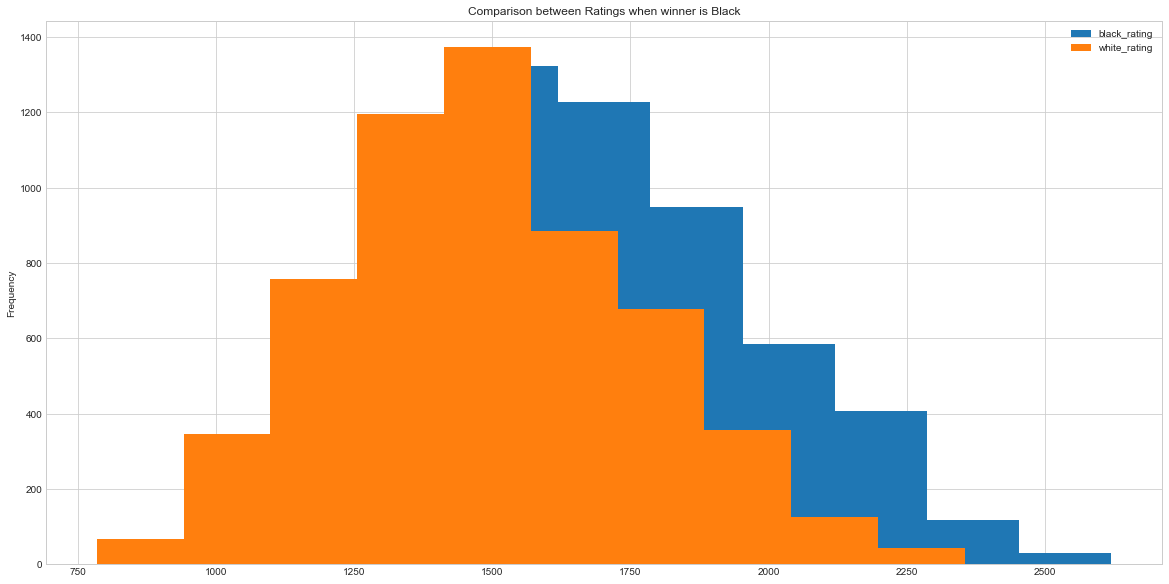

In [95]:
df_black2['black_rating'].plot(kind = 'hist')
df_black2['white_rating'].plot(kind = 'hist')
plt.title("Comparison between Ratings when winner is Black")
plt.legend(loc='upper right')
#plt.savefig('comp_winner_is_Black.png')
plt.show()

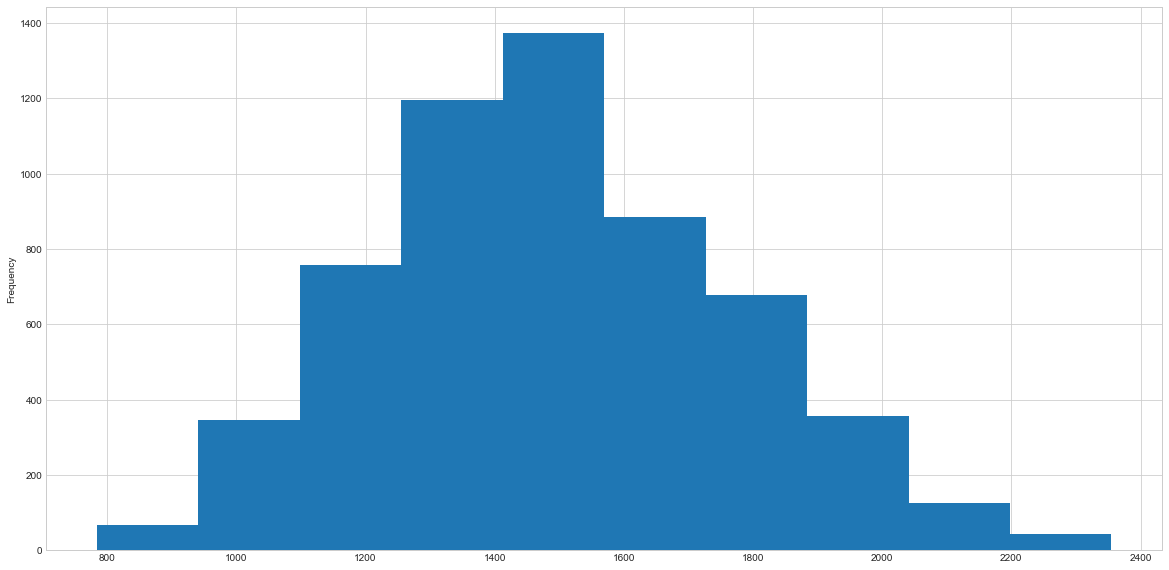

In [96]:
df_black2['white_rating'].plot(kind = 'hist')

### Black Wins while: Black and White are of EQUAL ratings

In [90]:
df_black3 = df_black[df_black['white_rating'] == df_black['black_rating']]
df_black3

,id,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply
118,Gz7Icasx,True,40,mate,black,10+0,1756,1756,e4 e5 Bc4 Nf6 d4 exd4 Qxd4 Nc6 Qe3 Bb4+ Bd2 O-...,C24,Bishop's Opening: Ponziani Gambit,5
323,Ger5Zno3,True,106,mate,black,10+0,1623,1623,e4 e5 Nf3 Nc6 Bb5 Nge7 O-O g6 d4 exd4 Nxd4 Bg7...,C60,Ruy Lopez: Cozio Defense,6
386,F0rtsvLh,True,40,resign,black,10+0,1500,1500,e4 d5 d3 dxe4 dxe4 Qxd1+ Kxd1 h6 Be2 e5 Nc3 Nf...,B01,Scandinavian Defense,2
854,iZxEsXji,True,66,outoftime,black,8+0,1853,1853,e4 d5 exd5 Nf6 c4 e6 Nc3 exd5 cxd5 Nxd5 d4 Bf5...,B01,Scandinavian Defense: Icelandic-Palme Gambit,6
897,wqOb8n7u,True,62,mate,black,10+0,1540,1540,e4 c5 Bc4 e6 Nf3 Nf6 e5 Ng4 d4 cxd4 Nxd4 Nxe5 ...,B20,Sicilian Defense: Bowdler Attack,3
...,...,...,...,...,...,...,...,...,...,...,...,...
19849,2b9wj4cI,False,66,resign,black,10+0,1500,1500,e4 e5 Nf3 Nf6 Nxe5 c6 d3 Qa5+ Nd2 Qxe5 Nf3 Qc7...,C42,Petrov's Defense #2,5
19851,dYJFGrab,False,98,resign,black,10+0,1500,1500,e4 e5 Nf3 d6 d4 exd4 Nxd4 a6 Bc4 Qh4 Qf3 Nf6 N...,C41,Philidor Defense: Exchange Variation #2,7
19855,Cyp31Glx,False,30,resign,black,10+0,1500,1500,e4 e6 d4 d5 e5 c5 c3 Nc6 Nf3 cxd4 Nxd4 Nxe5 Qe...,C02,French Defense: Advance Variation | Paulsen A...,9
19857,gvrbnQkc,False,56,resign,black,10+0,1500,1500,e4 e5 Nf3 Nc6 Bb5 a6 Bxc6 dxc6 Nxe5 Qd4 Nf3 Qx...,C68,Ruy Lopez: Exchange Variation,7
